In [324]:
import sqlite3
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
import numpy as np

In [325]:
conn = sqlite3.connect('ApexLegendGlobalSeries.db') 
c = conn.cursor()

c.execute('''
          CREATE TABLE GroupGame1 ('Team' TEXT PRIMARY KEY, '1' INT, 
          'A' INT, '2' INT, 'B' INT, '3' INT, C INT, 
          '4' INT, 'D' INT, '5' INT, 'E' INT, '6' INT, F INT)
          ''')
c.execute('''
          CREATE TABLE GroupGame2 ('Team' TEXT PRIMARY KEY, '7' INT, 
          'G' INT, '8' INT, 'H' INT, '9' INT, I INT, 
          '10' INT, 'J' INT, '11' INT, 'K' INT, '12' INT, L INT)
          ''')
c.execute('''
          CREATE TABLE GroupGame3 ('Team' TEXT PRIMARY KEY, '13' INT, 
          'M' INT, '14' INT, 'N' INT, '15' INT, O INT, 
          '16' INT, 'P' INT, '17' INT, 'Q' INT, '18' INT, R6_K INT)
          ''')
conn.commit()



In [509]:
g1.to_sql('GroupGame1',conn,if_exists='replace',index=False)
conn.commit()
g2.to_sql('GroupGame2',conn,if_exists='replace',index=False)
conn.commit()
g3.to_sql('GroupGame3',conn,if_exists='replace',index=False)
conn.commit()

In [524]:
g1 = pd.read_csv('GroupGame1.csv', low_memory=False)
g2 = pd.read_csv('GroupGame2.csv', low_memory=False)
g3 = pd.read_csv('GroupGame3.csv', low_memory=False)

In [525]:
g1 = pd.merge(g1, g2, on='Team')
g1 = pd.merge(g1, g3, on='Team')
g1 = g1.drop('Total_x', axis=1)
g1 = g1.drop('Total_y', axis=1)
g1 = g1.drop('Total', axis=1)


In [526]:
g1T_points = (g1.iloc[:,1:][g1.columns[1::2]]).T
g1T_points.columns = g1['Team']

g1T_points.insert(0,"Value", [*range(1,19)], True)

g1T_points.index
#g1T_points = g1T_points.drop(index=('Team'))
g1.iloc[:,1:][g1.columns[1::2]]

g1T_points

Team,Value,XSET,JLE,MST,NTH,SSG,E36,FCD,TSM,100T,...,ONIC,GHS,ESA,SNG,FUN,KCP,ACE,GO,K1CK,VXD
1,1,1,13,4,14,8,15,18,2,3,...,11,9,13,10,15,20,3,17,4,14
2,2,1,15,5,13,3,4,14,16,7,...,12,1,2,5,6,20,15,14,9,18
3,3,12,5,2,1,9,4,7,17,19,...,2,14,10,19,18,20,16,17,6,13
4,4,6,4,9,10,13,2,11,12,5,...,12,17,11,6,10,9,4,15,19,14
5,5,13,1,19,4,3,6,14,11,10,...,3,13,12,14,10,9,16,4,18,19
6,6,10,2,3,16,18,17,1,11,15,...,7,18,13,20,8,3,17,14,19,16
7,7,15,9,13,3,8,12,17,1,19,...,18,8,10,11,7,11,16,2,20,14
8,8,15,4,2,9,13,14,11,4,8,...,19,18,12,10,14,6,3,7,10,19
9,9,5,11,20,11,1,4,5,13,1,...,14,6,3,18,2,3,16,15,9,19
10,10,12,17,8,2,3,1,6,18,2,...,16,15,10,9,12,13,3,9,11,16


In [527]:
g1.to_csv('combinedgroupstage.csv', index=True)
g1T_points.to_csv('combinedgroupstageT.csv', index=True)


#g1.insert(0,"Value", [*range(1,41)], True)
#g1.index = g1['Team']
#g1 = g1.drop(columns=['Team'])

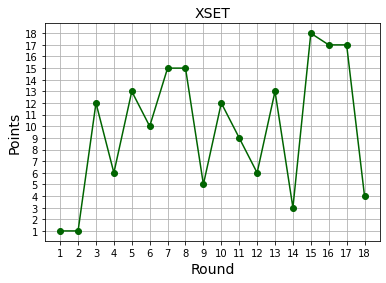

In [332]:
import matplotlib.pyplot as plt
   
x = [*range(1,19)]
y = g1.iloc[0,1:][g1.columns[1::2]]
  
plt.plot(x, y, color='darkgreen', marker='o')
plt.title('XSET', fontsize=14)
plt.xlabel('Round', fontsize=14)
plt.ylabel('Points', fontsize=14)
plt.grid(True)
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.yticks(np.arange(min(y), max(y)+1, 1.0))
z='xset'
plt.savefig(z + '.png')
plt.show()

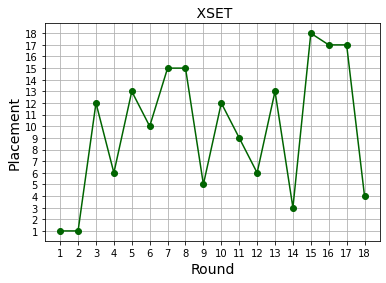

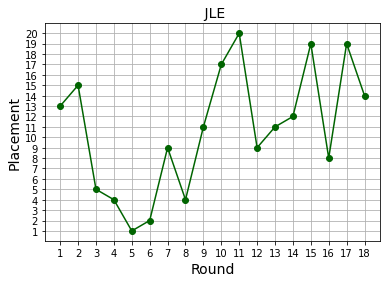

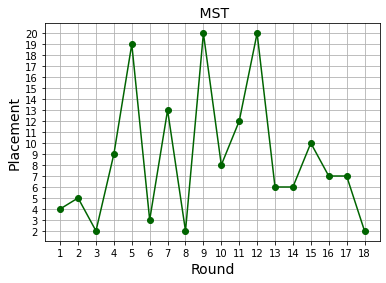

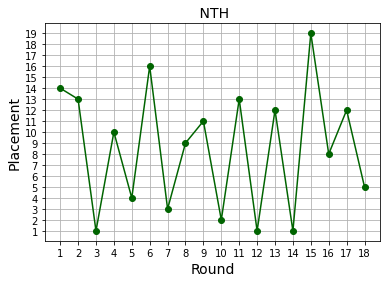

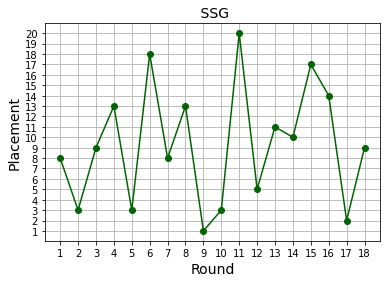

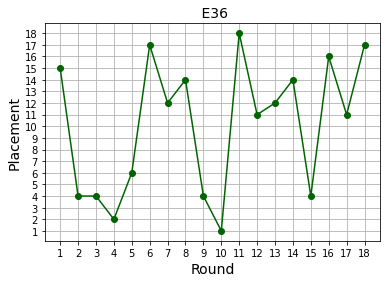

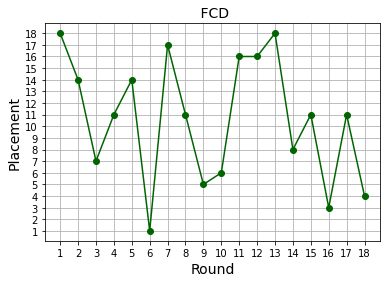

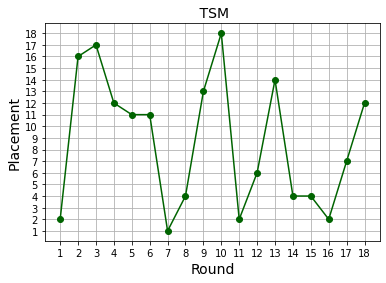

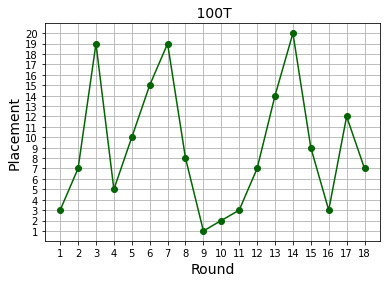

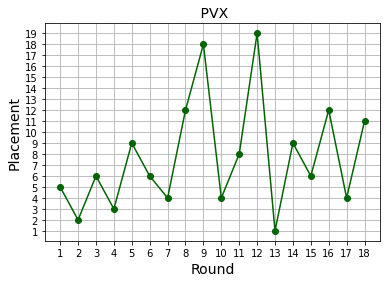

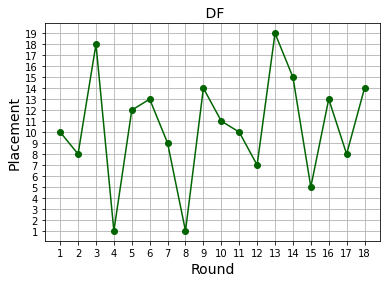

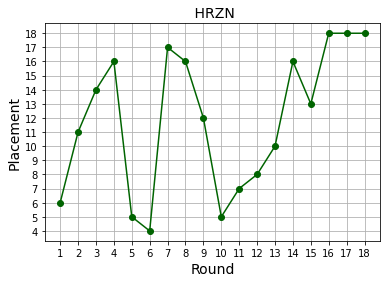

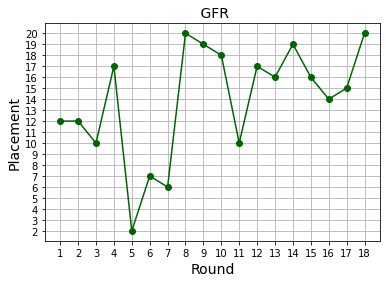

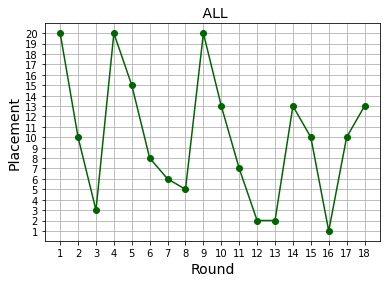

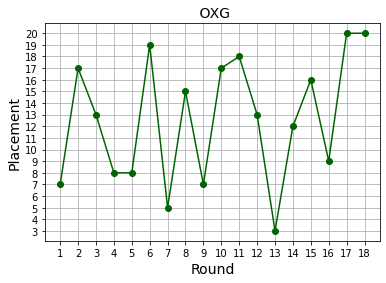

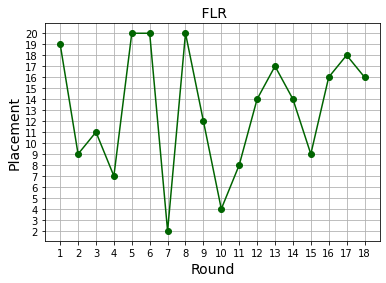

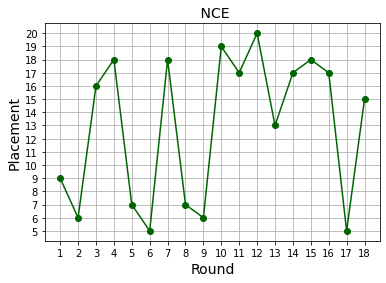

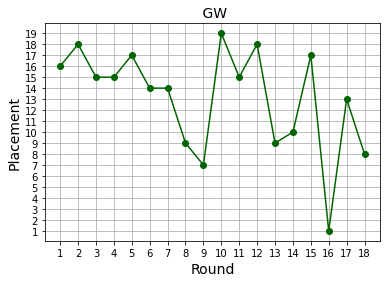

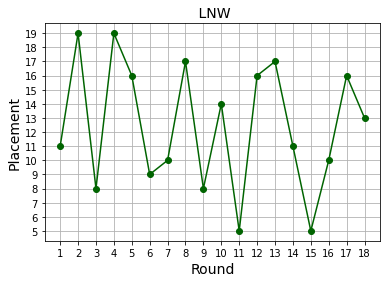

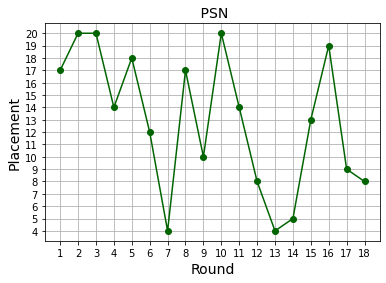

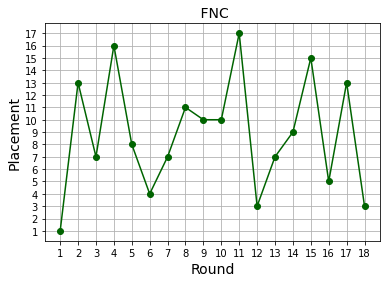

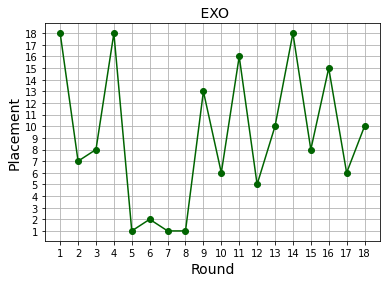

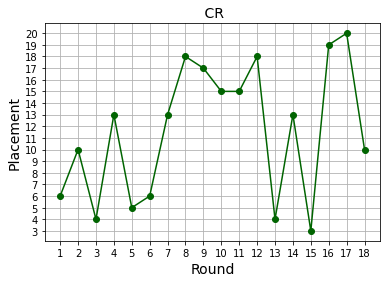

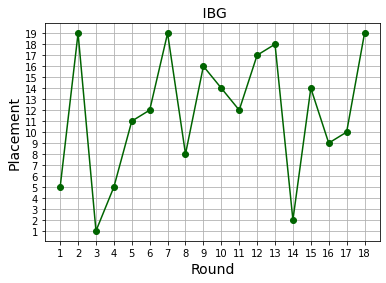

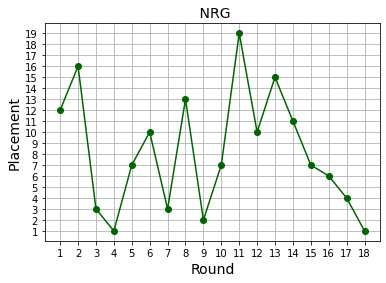

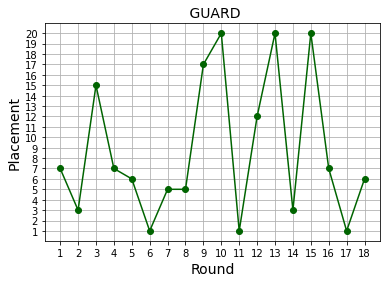

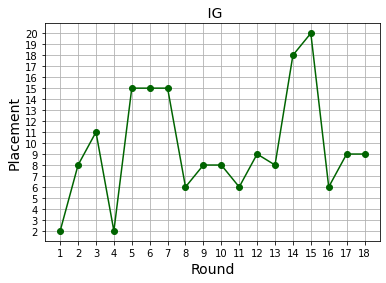

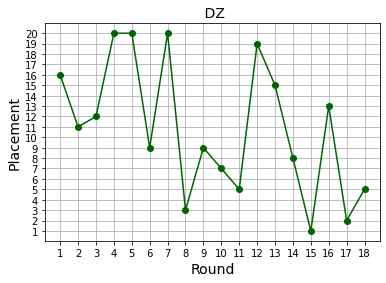

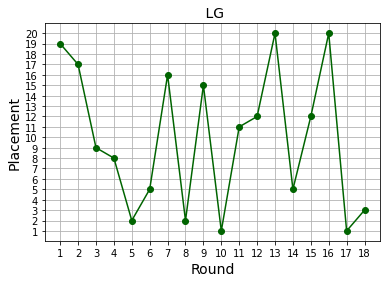

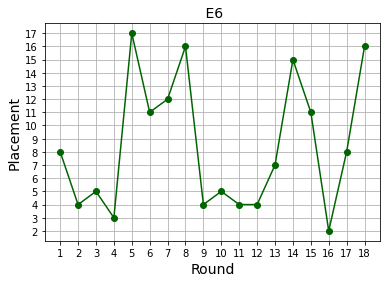

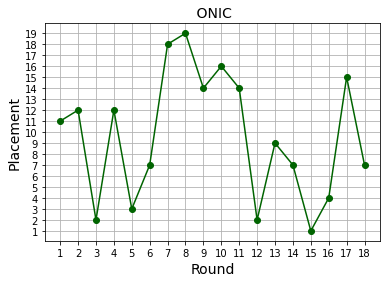

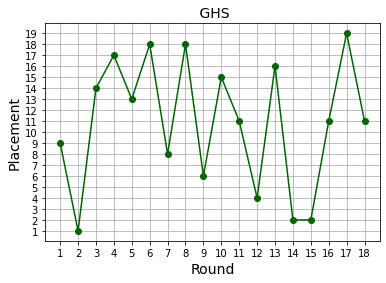

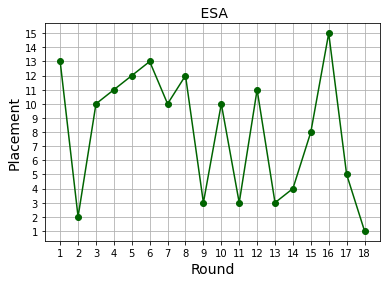

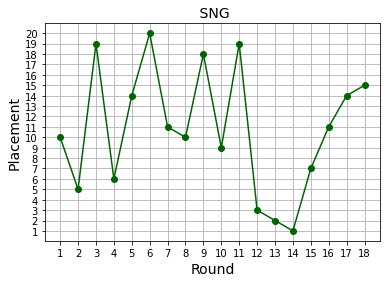

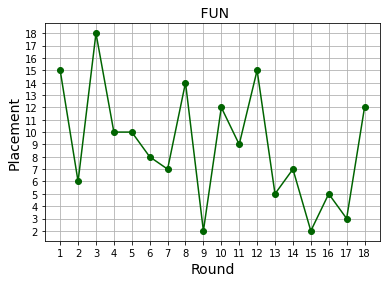

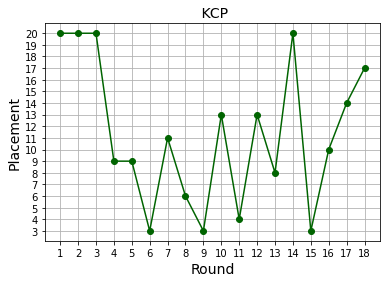

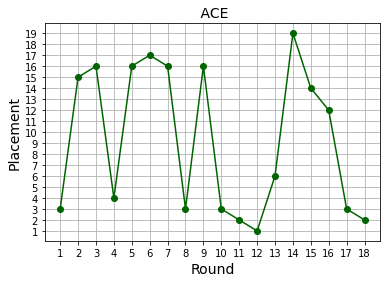

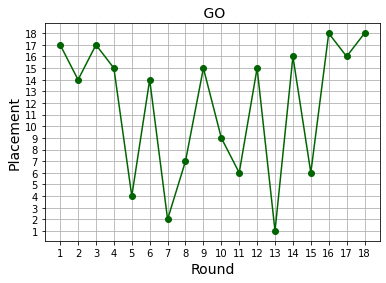

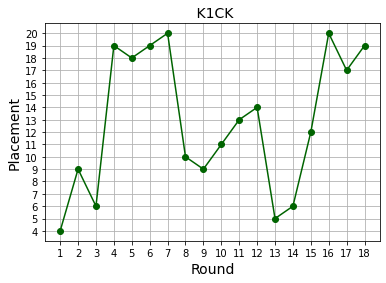

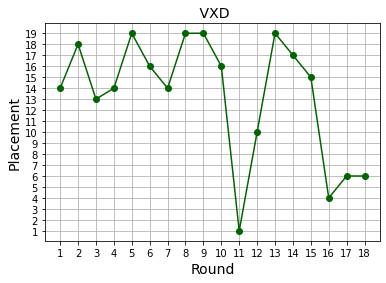

In [334]:
# placement line graph for each team
i=0
for z in g1['Team']:
    x = [*range(1,19)]
    y = g1.iloc[i,1:][g1.columns[1::2]]

    plt.plot(x, y, color='darkgreen', marker='o')
    plt.title(z, fontsize=14)
    plt.xlabel('Round', fontsize=14)
    plt.ylabel('Placement', fontsize=14)
    plt.grid(True)
    plt.xticks(np.arange(min(x), max(x)+1, 1.0))
    plt.yticks(np.arange(min(y), max(y)+1, 1.0))
    plt.savefig(z + '.png', bbox_inches='tight')
    plt.show()
    i+=1


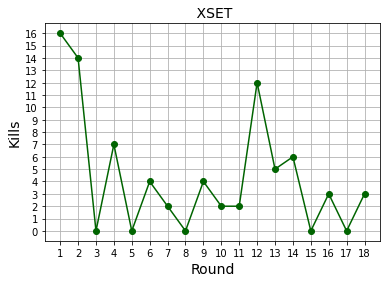

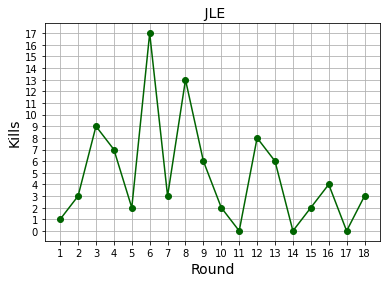

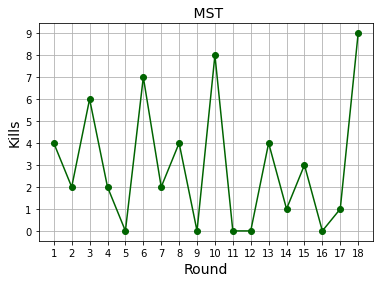

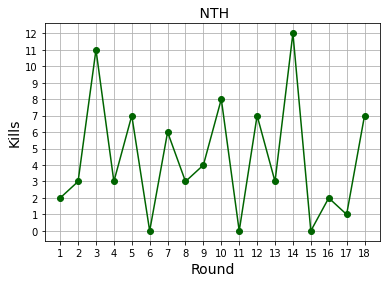

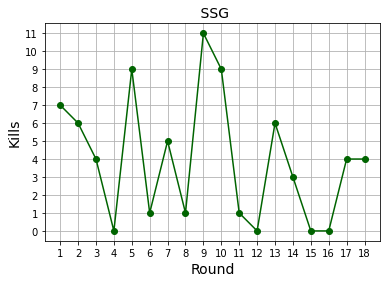

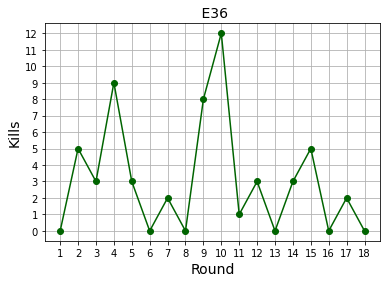

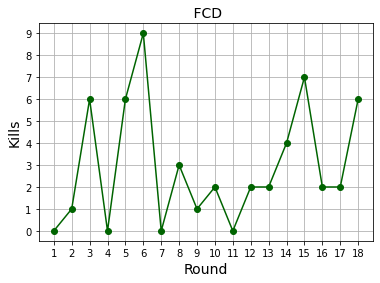

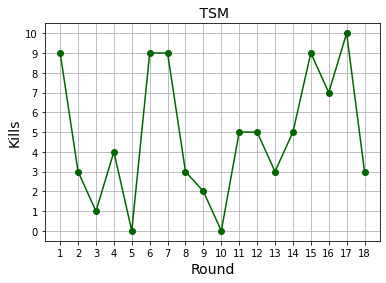

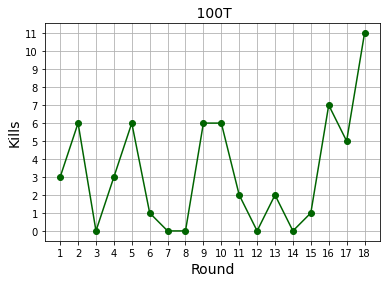

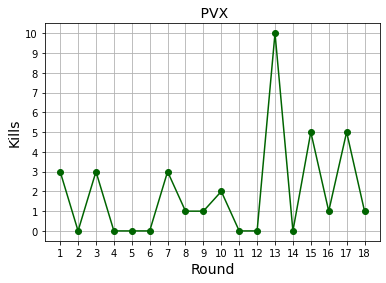

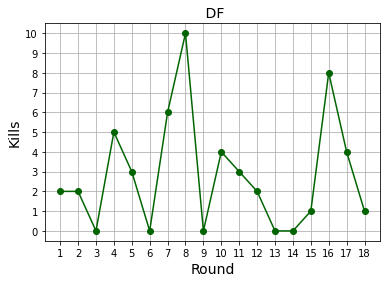

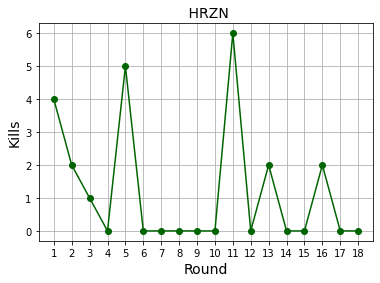

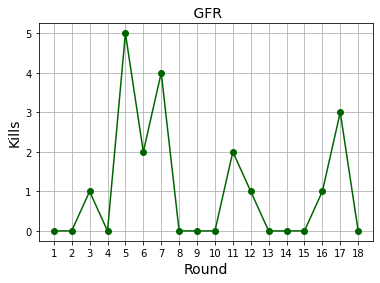

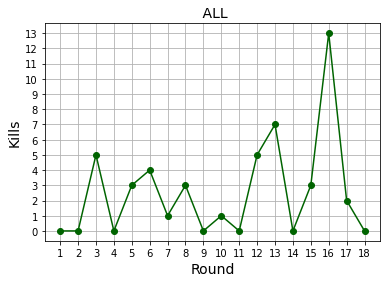

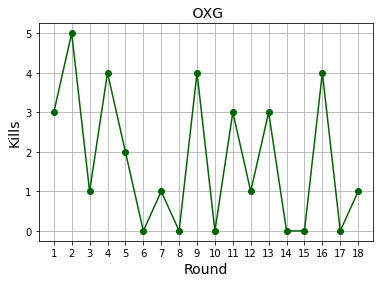

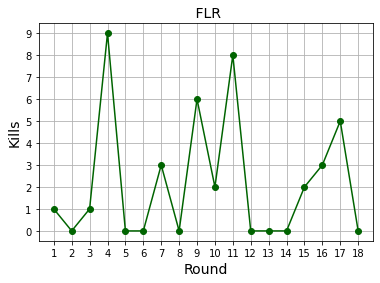

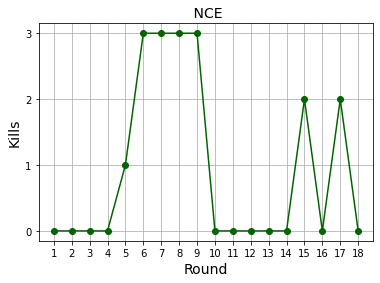

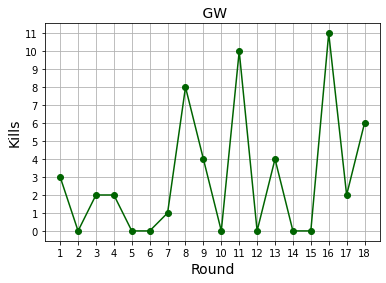

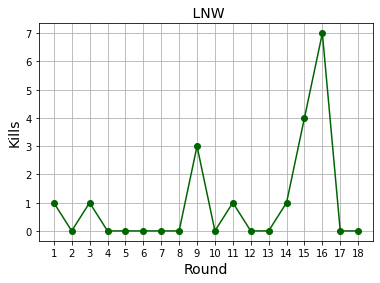

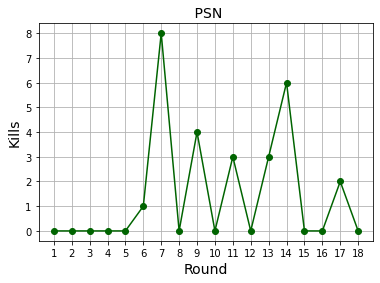

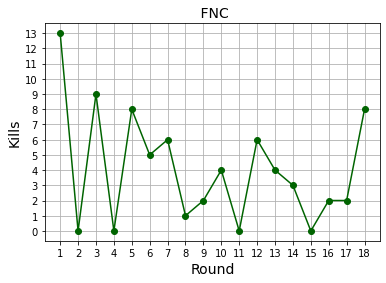

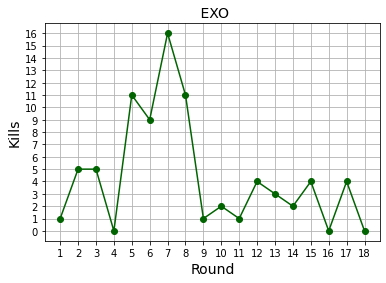

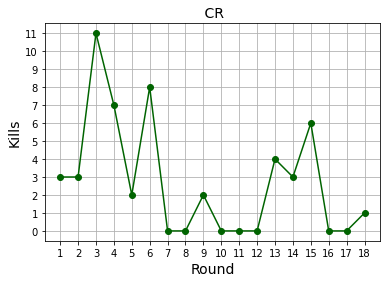

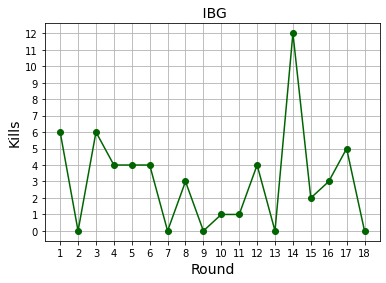

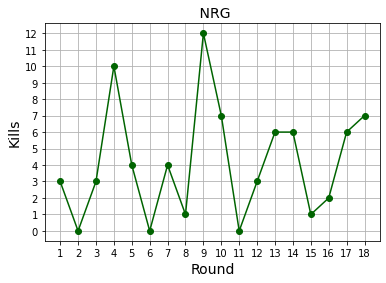

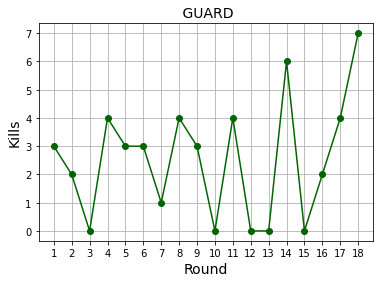

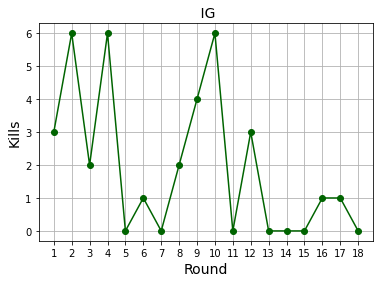

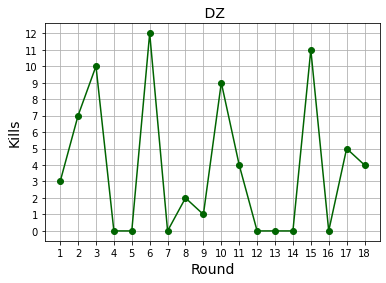

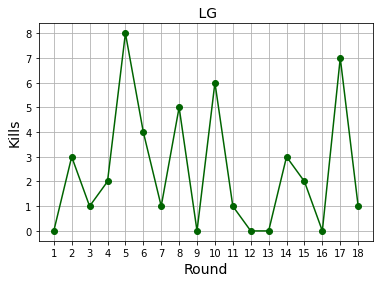

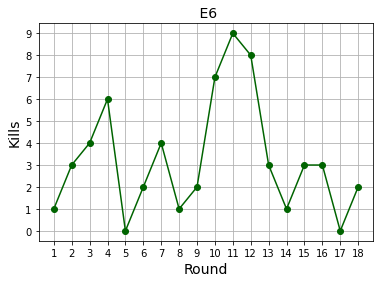

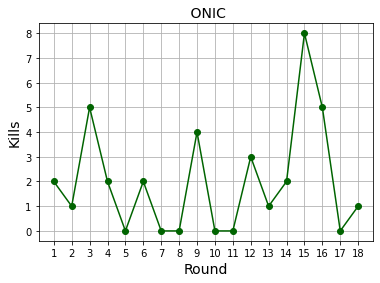

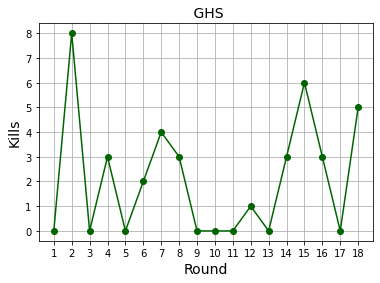

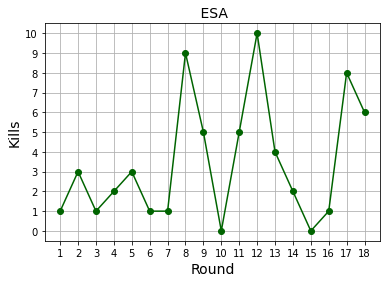

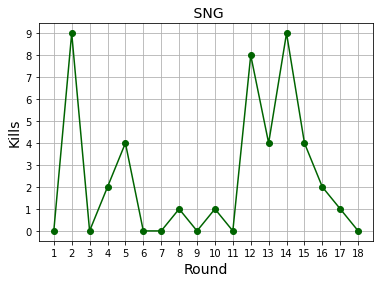

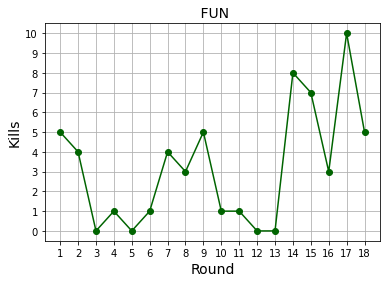

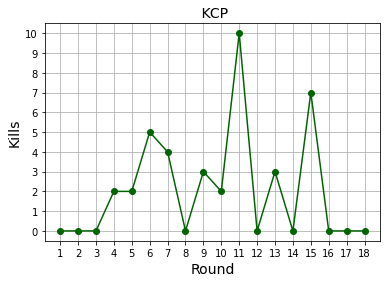

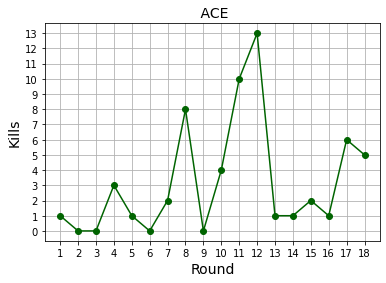

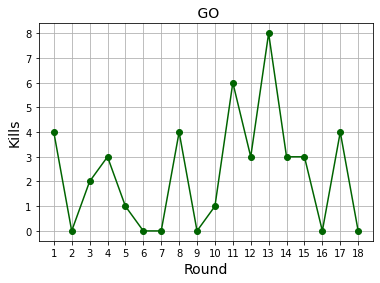

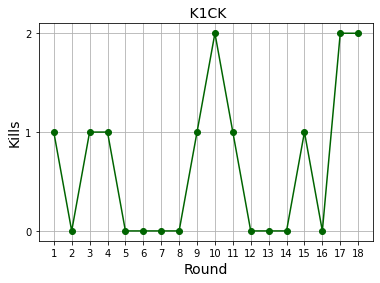

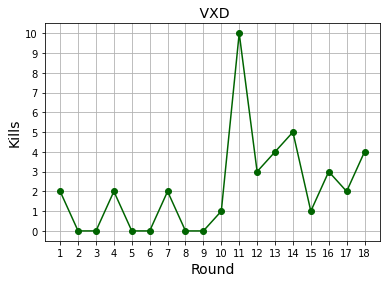

In [335]:
# kills line graph for each team
i=0
for z in g1['Team']:
    x = [*range(1,19)]
    y = g1.iloc[i,0:][g1.columns[::2]]
    y = y[1:]

    plt.plot(x, y, color='darkgreen', marker='o')
    plt.title(z, fontsize=14)
    plt.xlabel('Round', fontsize=14)
    plt.ylabel('Kills', fontsize=14)
    plt.grid(True)
    plt.xticks(np.arange(min(x), max(x)+1, 1.0))
    plt.yticks(np.arange(min(y), max(y)+1, 1.0))
    plt.savefig(z + 'kills.png', bbox_inches='tight')
    plt.show()
    i+=1

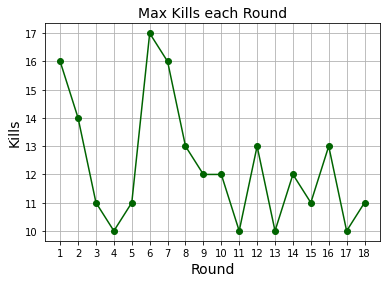

In [337]:
# max / min / average points from each round

g1max = g1.iloc[:,0:][g1.columns[::2]].max()
y = g1max[1:]

x = [*range(1,19)]
plt.plot(x, y, color='darkgreen', marker='o')
plt.title('Max Kills each Round', fontsize=14)
plt.xlabel('Round', fontsize=14)
plt.ylabel('Kills', fontsize=14)
plt.grid(True)
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.yticks(np.arange(min(y), max(y)+1, 1.0))
plt.savefig('MeanKills.png', bbox_inches='tight')
plt.show()

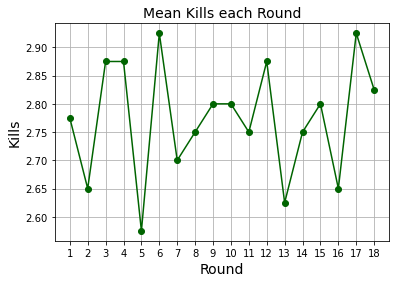

In [336]:
# max / min / average points from each round

y = g1.iloc[:,0:][g1.columns[::2]].mean()

x = [*range(1,19)]
plt.plot(x, y, color='darkgreen', marker='o')
plt.title('Mean Kills each Round', fontsize=14)
plt.xlabel('Round', fontsize=14)
plt.ylabel('Kills', fontsize=14)
plt.grid(True)
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.savefig('MeanKills.png', bbox_inches='tight')
plt.show()

In [267]:
g1max = g1.iloc[:,0:][g1.columns[::2]].mean()
print(g1max)

A    2.775
B    2.650
C    2.875
D    2.875
E    2.575
F    2.925
G    2.700
H    2.750
I    2.800
J    2.800
K    2.750
L    2.875
M    2.625
N    2.750
O    2.800
P    2.650
Q    2.925
R    2.825
dtype: float64
